# Fractals

Generation of Mandelbrots, Multibrots, and other fractals with Python

In [328]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
import math
import random

In [207]:
abs(complex(-5, -10))

11.180339887498949

In [333]:
def tile(ims, n, d):
    ims = np.reshape(ims, [*n, *d])
    combined = np.concatenate(np.concatenate(ims, axis=2), axis=0)
    return combined

log = math.log
class Fractal:
    def __init__(self, z=0, d=2, b=10e5, n=20, o=(-0.5, -0.5), m=4, r=(100, 200)):
        if type(r) is int:
            r = [r] * 2
        if type(o) in [int, float]:
            o = [o] * 2
        
        self.r = np.array(r)
        canvas = np.zeros(r)
        iterations = np.zeros(r)
        for x, y in np.ndindex(canvas.shape):
            z_ = z
            c = (complex(y, x) / r[0] + complex(*o)) * m
            for i in range(n):
                z_ = z_ ** d + c
                if abs(z_) > b:
    #                 canvas[x, y] += i
                    canvas[x, y] = self.norm(abs(z_), i)
                    iterations[x, y] = i
                    break

        print(iterations)
        canvas = self.scale(canvas, iterations.min(), iterations.max())
        self.canvas = canvas ** (1/2)

#         return canvas

    def norm(self, x, i):
    #     print(x)
        if x == 0:
            y = 0
        else:
            y = i + 1 - log(abs(log(x))) / log(2)
        return y

    def scale(self, x, a, b):
        return (x - a) / (b - a)
    
    def render(self):
        return self.canvas
    
    def display(self, cmap=plt.colormaps()):
        if type(cmap) in [list, tuple]:
            cmap = random.choice(cmap)
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot()
        image = self.render()
        ax.imshow(image, cmap=cmap)
        plt.axis('off')
        return fig, ax
    
    def find_regions(self, func=np.var, num=5):
        blocks = []
        w, h = np.array(self.r / num, dtype=int)
        for a in range(num):
            for b in range(num):
                block = self.canvas[a*h: (a+1)*h, b*w: (b+1)*w]
                variance = func(block)
                blocks.append([a, b, w, h, variance])
        return blocks
    
    def autozoom(self):
        region = self.find_regions()
        region.sort(key=lambda x: x[-1], reverse=True)
        region = region[0]
        a, b, w, h, v = region
        region = self.canvas[a*h: (a+1)*h, b*w: (b+1)*w]
        return region
    
    def __call__(self):
        return self.display()



[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


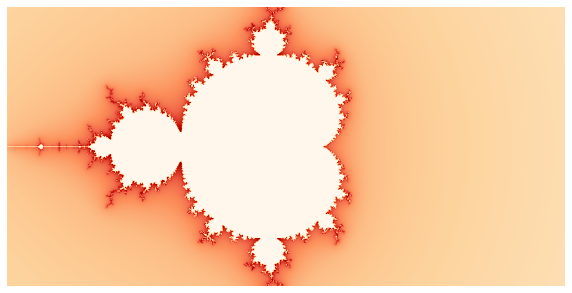

In [339]:
class FractalSet:
    def __init__(self, **kwargs):
        self.fractals = []
#         w = {a:b for (a, b) in kwargs.items() if type(b[0]) in [int, float]}
        w = {}
        self.fixed = {}
        for a, b in kwargs.items():
#             if type(b[0]) in [int, float]:
#             if len(b) == 3:
            if a not in 'r' and type(b) in [list, tuple]:
                if len(b) == 2:
                    b.append(kwargs['q'])
                w[a] = b
            elif a not in 'q':
                self.fixed[a] = b
        self.mdims = [b[-1] for a, b in w.items()]
        self.params = product(*[np.linspace(*b) for a, b in w.items()])
    
    def render(self, **kwargs):
        for p in self.params:
            self.fractals.append(generate(*p, **self.fixed))
        composite = self.fractals
        if 'axes' in kwargs and kwargs['axes']:
            print(kwargs['axes'][0])
            composite = kwargs['axes'][0](self.fractals, axis=0)
            self.mdims = [1, 1]
        composite = tile(composite, self.mdims, self.fixed['r'])
        return composite
    
    def __call__(self, **kwargs):
        return self.render(**kwargs)
    
# f = generate(r=(500, 1000), b=10, n=30, o=(-1, -0.5), m=2)
f = Fractal(r=(500, 1000), b=10, n=30, o=(-1, -0.5), m=2)
# f = FractalSet(z=[0, 1.5], d=[1, 5], r=[200]*2, q=10)(axes=[])
# print(f.find_regions())
block = f.autozoom()
f = f()
# ax.imshow(f, cmap='plasma')
# ax.imshow(block)
# plt.axis('off')
# list or dict for params?

# TODO: multicolored fractals

In [336]:
np.var(np.random.uniform(0, 1, [5, 5, 3]))

0.08875915242705291

In [247]:
f

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [2.84248223e-263, 8.24974972e-262, 2.39439343e-260, ...,
        5.14606062e-180, 1.49154857e-178, 4.32326186e-177],
       [1.57497566e-175, 4.57075020e-174, 1.32651107e-172, ...,
        2.85279246e-092, 8.26873246e-091, 2.39672777e-089],
       [8.72706032e-088, 2.53253729e-086, 7.34939887e-085, ...,
        1.58147028e-004, 4.58391210e-003, 1.32868456e-001]])